## Часть 1. О теореме Байеса

### Задание 1
Произошло убийство. На месте убийства найдена кровь, которая явно (будем
считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь
принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так
получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно
такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью
99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие
вероятности он оценил, а какие должен был оценить.

### Решение
Пусть $P(A)$ - подсудимый виновен, $P(B)$ - у подсудимого редкая группа крови

$P(B|A) = 1$, $P(B) = 0.01$ - по условию. Прокурор оценил $P(B|\bar{A})$ как 0.01, однако $P(B|\bar{A}) <> P(B)$

Нужно оценивать $P(A|B) = \frac{P(A) * P(B|A)}{P(B)} = \frac{P(A)}{0.01}$ , видно, что $P(A)$ в 100 раз больше, чем $P(A|B)$, а значит предположение о 99% вины неверно.

### Задание 2
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе
живёт миллион человек. Это значит, что примерно у 10000 из них такая группа
крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил
убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не
является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность
того, что мой подзащитный виновен, так что предлагаю исключить его из
материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие
должен был оценить.

### Решение
Пусть $P(A)$ - подсудимый виновен, $P(B)$ - у подсудимого редкая группа крови

$P(B|A) = 1$, $P(B) = 0.01$ - по условию. Адвокат оценил $P(\bar{A})$ как 0.0001, однако $P(\bar{A}) <> P(B) * P(B)$

Нужно оценивать $P(\bar{A}|B) = \frac{P(\bar{A}) * P(B|\bar{A})}{P(B)} 
= \frac{P(\bar{A}) * P(B|\bar{A})}{P(B)}$ (1)

Рассмотрим $P(B) = P(B|A)*P(A) + P(B|\bar{A})*P(\bar{A})$ => $P(B|\bar{A}) = \frac{P(B) - P(B|A)*P(A)}{P(\bar{A})} = \frac{P(B)-P(A)}{P(\bar{A})}$ 

Подставим в (1) и получим $P(\bar{A}|B) = \frac{P(B) - P(A)}{P(B)} = \frac{0.01 - P(A)}{0.01} = 1 - \frac{P(A)}{0.01}$

### Задание 3
Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по
предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки
5% в обе стороны. Мы видели, что в результате человек с положительным тестом
имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное
исследование и улучшить качество теста. Но сил и денег хватит только для того,
чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives
(когда тест выдаёт положительный результат у здорового человека), или только
число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни
после положительного и отрицательного теста от обоих видов ошибок (например, ввиде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше
сосредоточиться?

### Решение

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

A - человек болеет, В - тест положительный, тогда

$P(A|\bar{B}) = \frac{P(\bar{B}|A) * P(A)}{P(\bar{B}|A)*P(A) + P(\bar{B}|\bar{A})*P(\bar{A})}$ - Posterior False Negative

Где $P(\bar{B}|A)$ - Prior False Negative, $P(\bar{B}|\bar{A})$ - True Negative

In [33]:
def posterior(fp, fn, disease=0.01, prob_positive=True):
    tn = 1 - fp
    tp = 1 - fn
    not_disease = 1 - disease
    return tp * disease / (tp * disease + fp * not_disease) if prob_positive else fn * disease / (fn * disease + tn * not_disease)

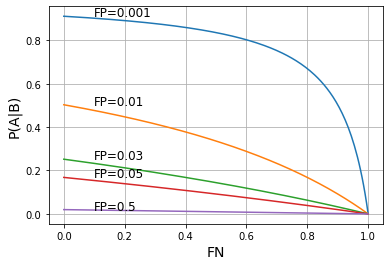

In [45]:
plt.figure()
for fp in [0.001, 0.01, 0.03, 0.05, 0.5]:
    poster = [posterior(fp, fn) for fn in np.linspace(1e-9, 1, 200)]
    plt.plot(np.linspace(1e-9, 1, 200), poster)
    plt.text(0.1, poster[0], f'FP={fp}', fontsize=12)
plt.xlabel('FN', fontsize=14)
plt.ylabel('P(A|B)',fontsize=14)
plt.grid()
plt.show()

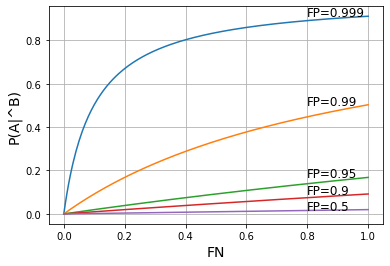

In [46]:
plt.figure()
for fp in [0.999, 0.99, 0.95, 0.9, 0.5]:
    poster = [posterior(fp, fn, prob_positive=False) for fn in np.linspace(1e-9, 1, 200)]
    plt.plot(np.linspace(1e-9, 1, 200), poster)
    plt.text(0.8, poster[-1], f'FP={fp}', fontsize=12)
plt.xlabel('FN', fontsize=14)
plt.ylabel('P(A|^B)',fontsize=14)
plt.grid()
plt.show()

Можно заметить, что изменение FP в районе 0.01 - 0.05 хорошо влияют на апостериорную вероятность болезни после положительного теста. В тоже время, видно, что FN влияет сильно только при больших значениях FP. Лучше сосредоточиться на снижении FP.